$$\frac{dv}{dt} = v \frac{dv}{dx}$$

$$\frac{dv}{dx} = \frac{-9.81 + \frac{R^2}{(R+x)^2}}{v}$$

In [1]:
import numpy as np 

def f(X):
    
    R = 6.37 * 10e6
    g = 9.81
    
    return np.array([X[0][1], -g-((R/(R+X[0][0]))**2)]).reshape(1,2)


In [2]:
def euler(f, a, b, n, ya):
    """
    Calculate the solution of the initial-value problem from Euler method
    Parameters:
        f: Function f(x)
        a: Initial point
        b: End point
        n: Number of intervals
        ya: Initial value
    Returns:
        vx: Array containing x values
        vy: Array containing y values (solution of IVP)
    """

    vx = np.zeros(n)
    vy = np.zeros((n,2))

    h = (b - a) / n
    x = a
    y = ya

    vx[0] = x
    vy[0] = y

    fxy = f(y)
    print("i: {:03d}\t t: {:.4f}\t x: {:.4f}\t v: {:.4f}\n".format(0, x, y[0][0], y[0][1]), end="")

    for i in range(0, n):
        
        x = a + (i + 1) * h
        y = np.add(y, h * fxy, out=y, casting="unsafe").reshape((1,2))

        fxy = f(y)
        print("i: {:03d}\t t: {:.4f}\t x: {:.4f}\t v: {:.4f}\n".format(i + 1, x, y[0][0], y[0][1]), end="")
        vx[i] = x
        vy[i] = y
        

    return [vx, vy]

In [3]:
t, X = euler(f, 0, 75 , 750, np.array([0, 1500]).reshape(1,2))

i: 000	 t: 0.0000	 x: 0.0000	 v: 1500.0000
i: 001	 t: 0.1000	 x: 150.0000	 v: 1498.0000
i: 002	 t: 0.2000	 x: 299.0000	 v: 1496.0000
i: 003	 t: 0.3000	 x: 448.0000	 v: 1494.0000
i: 004	 t: 0.4000	 x: 597.0000	 v: 1492.0000
i: 005	 t: 0.5000	 x: 746.0000	 v: 1490.0000
i: 006	 t: 0.6000	 x: 895.0000	 v: 1488.0000
i: 007	 t: 0.7000	 x: 1043.0000	 v: 1486.0000
i: 008	 t: 0.8000	 x: 1191.0000	 v: 1484.0000
i: 009	 t: 0.9000	 x: 1339.0000	 v: 1482.0000
i: 010	 t: 1.0000	 x: 1487.0000	 v: 1480.0000
i: 011	 t: 1.1000	 x: 1635.0000	 v: 1478.0000
i: 012	 t: 1.2000	 x: 1782.0000	 v: 1476.0000
i: 013	 t: 1.3000	 x: 1929.0000	 v: 1474.0000
i: 014	 t: 1.4000	 x: 2076.0000	 v: 1472.0000
i: 015	 t: 1.5000	 x: 2223.0000	 v: 1470.0000
i: 016	 t: 1.6000	 x: 2370.0000	 v: 1468.0000
i: 017	 t: 1.7000	 x: 2516.0000	 v: 1466.0000
i: 018	 t: 1.8000	 x: 2662.0000	 v: 1464.0000
i: 019	 t: 1.9000	 x: 2808.0000	 v: 1462.0000
i: 020	 t: 2.0000	 x: 2954.0000	 v: 1460.0000
i: 021	 t: 2.1000	 x: 3100.0000	 v: 1458.00

In [4]:
X.shape

(750, 2)

In [5]:
x = X[:, 0]
v = X[:, 1]

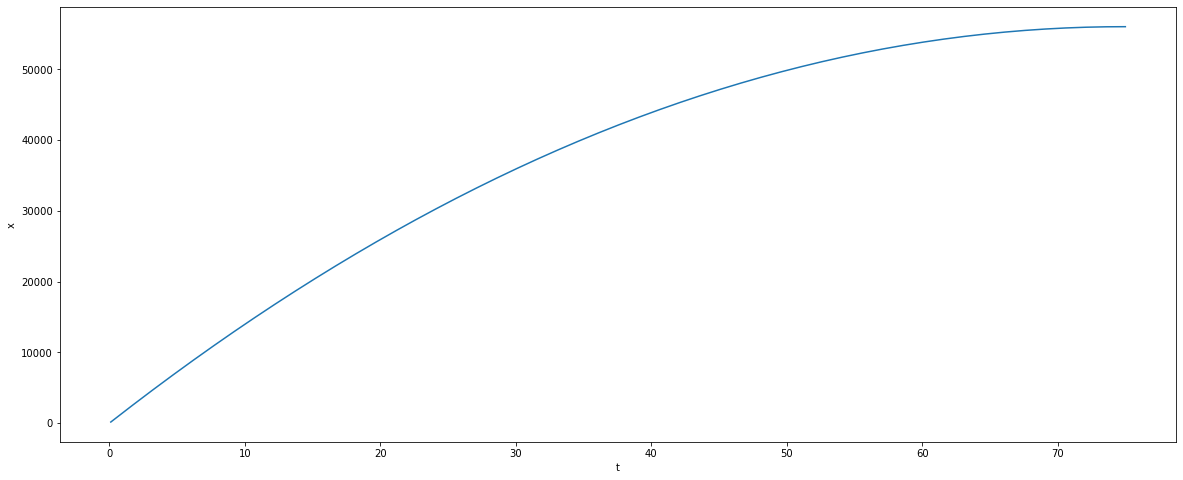

In [6]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,8))

plt.xscale('linear')
plt.yscale('linear')

plt.xlabel('t')
plt.ylabel('x')

plt.plot(t, x)

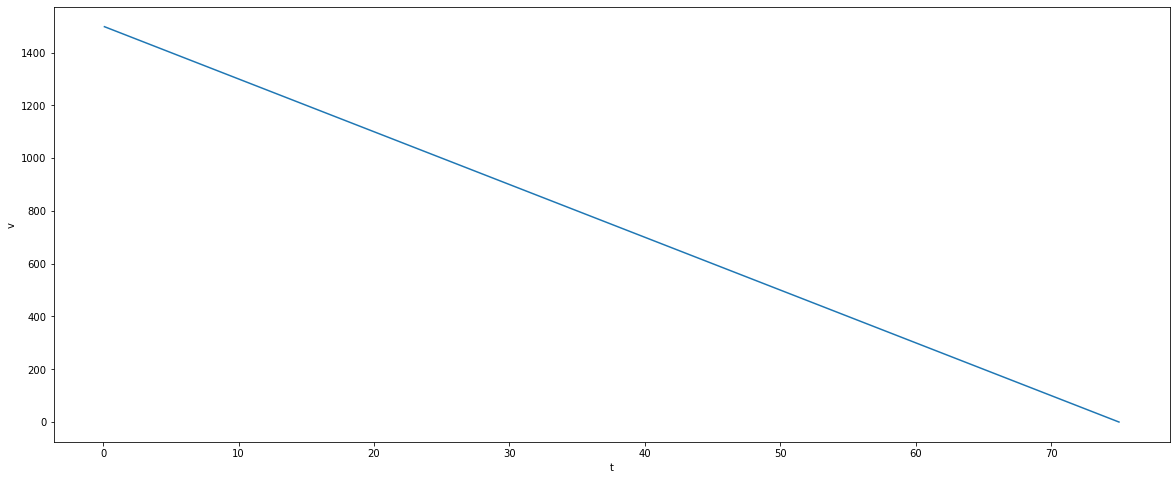

In [7]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,8))

plt.xscale('linear')
plt.yscale('linear')

plt.xlabel('t')
plt.ylabel('v')

plt.plot(t, v)

In [8]:
f = [lambda x, y : y[1], lambda x, y : -9.81-(( (6.37 * 10e6)/( (6.37 * 10e6)+y[0]))**2) ]

def rk4_system(f, a, b, n, ya):
    """
    Calculate the solution of systems of differential equations from
    Runge-Kutta (Order Four) method.
    Parameters:
        f: Array of functions f(x)
        a: Initial point
        b: End point
        n: Number of intervals
        ya: Array of initial values
    Returns:
        vx: Array containing x values
        vy: Array containing y values (solution of IVP)
    """

    m = len(f)

    k = [np.zeros(m), np.zeros(m), np.zeros(m), np.zeros(m)]

    vx = np.zeros(n + 1)
    vy = np.zeros((m, n + 1))

    h = (b - a) / n

    x = a
    y = ya

    vx[0] = x
    vy[:, 0] = y

    for i in range(0, n):

        for j in range(0, m):
            k[0][j] = h * f[j](x, y)

        for j in range(0, m):
            k[1][j] = h * f[j](x + h / 2, y + k[0] / 2)

        for j in range(0, m):
            k[2][j] = h * f[j](x + h / 2, y + k[1] / 2)

        for j in range(0, m):
            k[3][j] = h * f[j](x + h, y + k[2])

        x = a + i * h
        y = y + (k[0] + 2 * k[1] + 2 * k[2] + k[3]) / 6

        vx[i + 1] = x
        vy[:, i + 1] = y

    return [vx, vy]

In [9]:
t_, X_ = rk4_system(f, 0, 75, 750, np.array([0, 1500]))

In [10]:
x_, v_ = X[:, 0], X[:, 1]

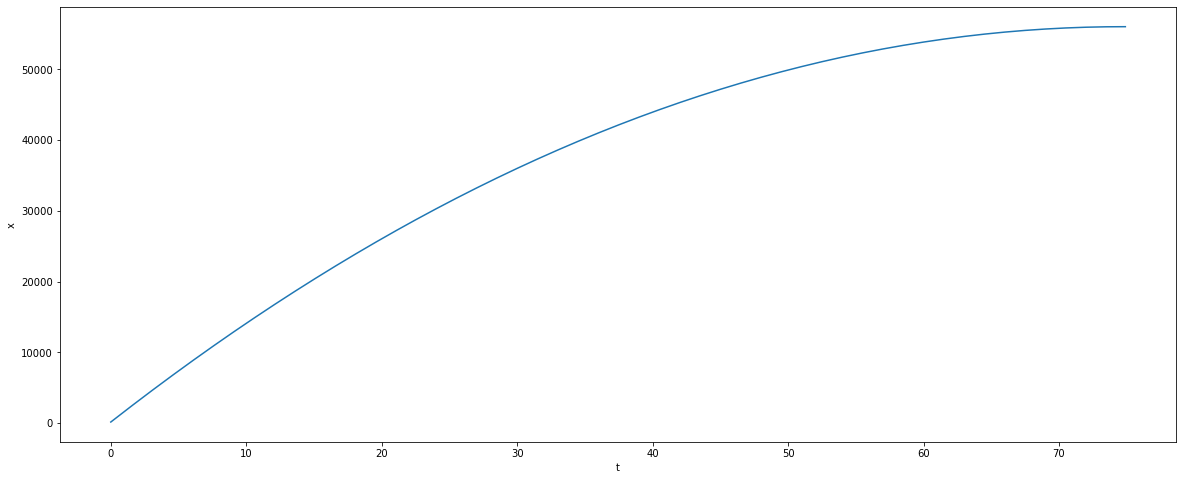

In [11]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,8))

plt.xscale('linear')
plt.yscale('linear')

plt.xlabel('t')
plt.ylabel('x')

plt.plot(t_[1:], x_)

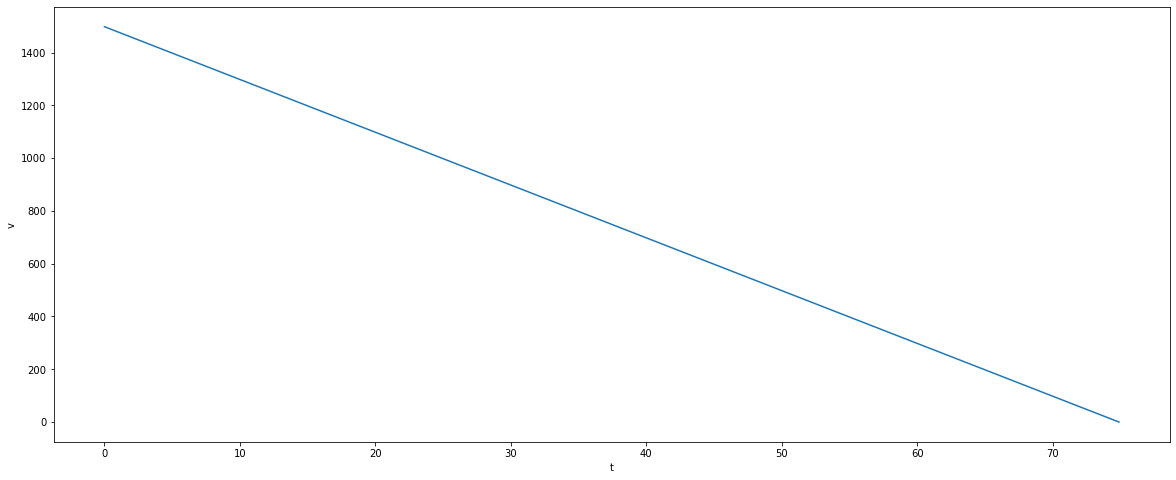

In [12]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,8))

plt.xscale('linear')
plt.yscale('linear')

plt.xlabel('t')
plt.ylabel('v')

plt.plot(t_[1:], v_)